## Astrodinámica para Ingeniería Aeroespacial
### Prof. Jorge I. Zuluaga
### Instituto de Física - Universidad de Antioquia

## Clase 3 - Problema de Lambert (parte 1)
<a target="_blank" href="https://colab.research.google.com/github/seap-udea/notas-astrodyn/blob/main/Clase-03-astrodyn-problema_lambert_1
.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requerimientos

In [6]:
!pip install -Uq pymcel
!pip install -Uq ipympl

Algunos magics requeridos:

In [7]:
import sys
if 'google.colab' in sys.modules:
    %matplotlib widget
    %matplotlib widget

## Formulación del problema

- Hemos aprendido hasta ahora:

    - Cómo determinar todos la posición y velocidad de un cuerpo sobre una órbita cónica sabiendo conociendo sus elementos orbitales $(a,e,I,\Omega,\omega,f)$.

    - Dado un valor inicial de la anomalía verdadera $f_0$ o el tiempo de paso por el periapsis de un cuerpo, cómo calcular el valor de la anomalía en cualquier momento del futuro.

    - Dada la posición y velocidad de un cuerpo en un momento dado, cómo calcular su posición y velocidad en cualquier momento del futuro.
    
- A esta forma de la solución al problema de los dos cuerpos se la conoce como la solución al problema de valor inicial (*Initial value problem*, IVP).

<!-- https://github.com/seap-udea/notas-astrodyn/blob/main/figuras/?raw=true -->
<center><img src="figuras/problema-lambert.png" width=400></br></center>



- Queremos ahora resolver una versión del problema diferente, una que tiene interesantes aplicaciones en el contexto de la navegación espacial (mecánica orbital):

    - Conozco las posiciones inicial y final de un cuerpo:

        - ¿Cuáles son todas las posibles trayectorias cónicas que unen esos dos puntos?

        - Dada la restricción de requerir que el tiempo de viaje sea uno específico $\Delta t$ ¿Cuál es la trayectoria que sigue? ¿Cuál es la velocidad inicial del cuerpo?

- Esta formulación del problema de los dos cuerpos se conoce matemáticamente como un problema de condiciones de frontera (*Boundary value problem*, BVP) y en la historia como *El problema de Lambert*. 

## El plano del problema de Lambert

- Naturalmente el problema de Lambert general ocurre en tres dimensiones, sin embargo, por la naturaleza del problema de los dos cuerpos, siempre es posible reducir el problema a uno en dos dimensiones.

- Para entenderlo debemos tener en cuenta que el centro del cuerpo central y los dos puntos $P_1$ y $P_2$ forman un plano. En geometría euclidiana, tres puntos definen siempre un plano. 

- Como el movimiento orbital se realiza también sobre un plano (por conservación del momentum angular), plano al que llamamos en mecánica celeste el *plano de Lagrange* y como sobre este plano están siempre los vectores posición y velocidad del cuerpo, entonces el plano de los vectores $\vec r_1$ y $\vec r_2$ debe también el plano de Lagrange.

<!-- https://github.com/seap-udea/notas-astrodyn/blob/main/figuras/?raw=true -->
<center><img src="figuras/problema-lambert-espacio.png" width=600></br></center>

- Podemos entonces definir la matriz de rotación que nos lleva de las coordenadas del sistema de referencia de observación $(x,y,z)$ al sistema de referencia del plano de Lambert en el que el punto $P_1$ siempre está sobre el eje x usando:

  $$
  \left(\begin{array}{c}
  x'''\\y'''\\z'''
  \end{array}\right)
  = R_z(\omega')R_x(I)R_z(\Omega)
  \left(\begin{array}{c}
  x\\y\\z
  \end{array}\right)  
  $$

- Aquí los ángulos $I,\Omega,\omega$ se pueden obtener, primero, calculando 2 vectores claves:

  $$
  \vec h' = \vec r_1 \times \vec r_2\\
  \vec N = \hat e_z \times \vec h'
  $$

> **NOTA**: No debe confundirse el vector $\vec h'\vec r_1 \times \vec r_2$ con el vector de momentum angular específico $\vec h=\vec r\times \vec v$. Aunque tienen la misma dirección (perpendicular al plano de Lambert), no tienen, ni las mismas unidades, ni el mismo significado físico.

  y luego usando productos punto debidamente definidos:

  $$
  \cos I = \frac{\vec h'\cdot \hat e_z}{h'}\\
  \cos \Omega = \frac{\vec N\cdot \hat e_x}{N}\\
  \cos \omega = \frac{\vec r_1\cdot \vec N}{N r_1}\\
  $$

> **NOTA**: Es importante entender aquí la discusión sobre los cuadrantes en los que están los ángulos $\Omega$ y $\omega$. Para un detalle de esa discusión ver *Sección 3.9.1. Determinación de órbita* en el libro de *Mecánica Celeste* de Zuluaga.

- En lo sucesivo la descripción del problema de Lambert se realizará en el sistema de coordenadas sobre el plano de Lambert. Con las definiciones dadas arriba usted siempre podrá pasar los vectores obtenidos en ese plano al plano de observación.

## El problema geométrico

### De la física a la geometría

- Los parámetros geométricos que definen completamente una cónica se pueden obtener a partir de las constantes de movimiento usando:

    - Vector de excentricidad

        $$
        \vec e = \frac{\vec h\times \vec v}{\mu} - \frac{\vec r}{r}
        $$

    - Semilatus rectum:

        $$
        p = \frac{h^2}{\mu}
        $$

        donde $\vec h=\vec r\times \vec v$.

- Dadas estas cantidades siempre es posible deducir otras propiedades geométricas y física de la curva:

  - Excentricidad: $e = |\vec e|$

  - Semieje mayor: $a = p/(1-e^2)$
    - Para una parábola: $a \rightarrow \infty$

  - Energía específica: $\epsilon = v_1^2/2 - \mu/r_1$

    - Para el caso de una elipse: $\epsilon = -\mu/(2a)$
  
  - Excentricidad a partir de los demás parámetros: $e = \sqrt{1 + 2 \epsilon h^2/\mu^2}$

### Dibujando una cónica a partir de sus propiedades geométricas

- Para dibujar una cónica debemos específicar o bien sus propiedades físicas o bien sus propiedades geométricas.

- Para cualquier cónica es posible representarla si se proveen tres cantidades: $p$, $e$ y $\omega$.

- Con estas tres cantidades, las coordenadas de cualquier punto sobre la cónica, provistos un conjunto de valores de $f\in(-\phi,\phi)$.

- El ángulo $f_\mathrm{max}$ es el máximo valor de la anomalía verdadera que es igual a:
  - Para elipse $f_\mathrm{max} = \pi$.
  - Para parábola e hipérbola: $\cos f_\mathrm{max} = -1/e$.

- El siguiente código permite dibujar la cónica en su sistema de referencia:

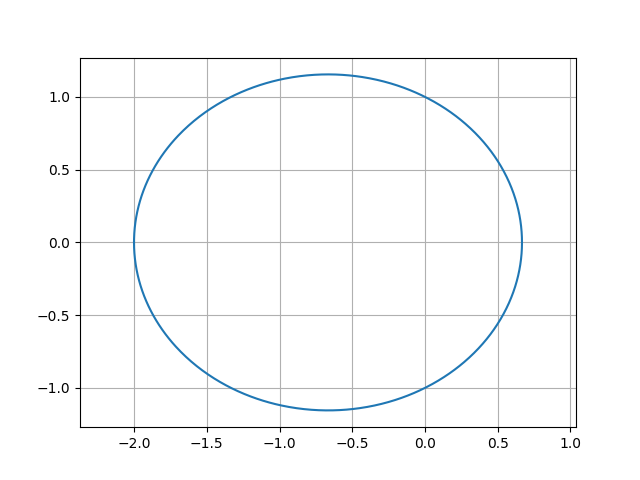

In [96]:
import numpy as np
p = 1
e = 0.5

fmax = 0.99*np.arccos(-1/e) if e>=1 else np.pi
fs = np.linspace(-fmax, fmax, 1000)
rs = p/(1+e*np.cos(fs))

xps = rs*np.cos(fs)
yps = rs*np.sin(fs)
zps = np.zeros_like(xps)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xps, yps)
ax.grid()
ax.axis('equal');

- Si queremos ahora agregar una rotación usaremos:

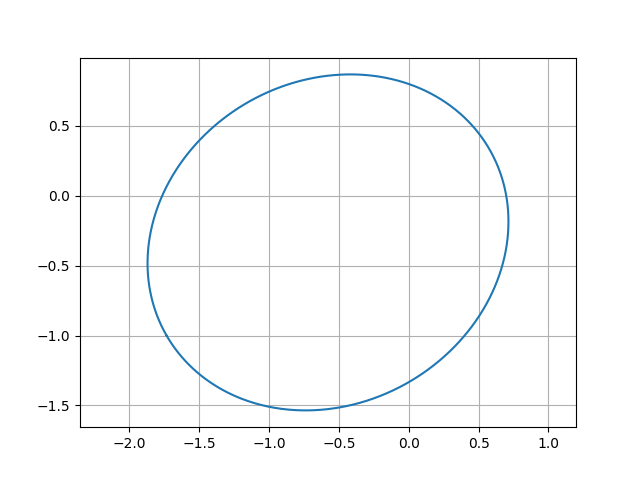

In [97]:
import pymcel as pc
import spiceypy as spy
deg = np.pi/180

w = 30*deg 
R = spy.rotate(-w, 3)
xs, ys, zs = pc.rota_puntos(R,xps,yps,zps)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xs, ys)
ax.grid()
ax.axis('equal');

- Hagmos ahora un código interactivo que nos permita modificar los tres parámetros $e$, $p$, $\omega$ y dibujar la cónica:

In [107]:
plt.close('all')
from ipywidgets import interact
@interact(e=(0,2,0.1), p=(0,2,0.1), w=(-180,180,0.1), zoom=(1,10,0.1))
def dibuja_conica(e=0.5,p=1,w=0,zoom=1):
    w = w*deg
    fmax = 0.99*np.arccos(-1/e) if e>=1 else np.pi
    fs = np.linspace(-fmax, fmax, 1000)
    rs = p/(1+e*np.cos(fs))

    xps = rs*np.cos(fs)
    yps = rs*np.sin(fs)
    zps = np.zeros_like(xps)

    R = spy.rotate(-w, 3)
    xs, ys, zs = pc.rota_puntos(R,xps,yps,zps)

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.plot(xs, ys)
    range = 2*p*zoom
    ax.set_xlim(-range,range)
    ax.set_ylim(-range,range)
    ax.grid()
    plt.show()
    return ax

interactive(children=(FloatSlider(value=0.5, description='e', max=2.0), FloatSlider(value=1.0, description='p'…

### El problema geométrico de Lambert

- Ahora estamos listos para abordar el problema geométrico de Lambert.

- Primero debemos escoger dos puntos:

In [108]:
P1 = [1,0,0]
P2 = [0.5,0.7,0]

- Creemos ahora un interactivo que combine cónica con puntos

In [113]:
@interact
def conica_y_puntos(e='0',p='1',w='0'):
    e = float(e)
    p = float(p)
    w = float(w)

    zoom = 2*np.linalg.norm(P2)/(2*p)
    plt.close('all')
    ax = dibuja_conica(e,p,w,zoom)
    ax.plot(P1[0],P1[1],'ro')
    ax.plot(P2[0],P2[1],'bo')

interactive(children=(Text(value='0', description='e'), Text(value='1', description='p'), Text(value='0', desc…

No such comm: f53021c7290d431f95de973cd512c56e
No such comm: f53021c7290d431f95de973cd512c56e


No such comm: 1dc8b82ac45a4587a525e36cae62bf82


No such comm: 25b9709bd9f84e919186ae9b7f0a2308


### Encontrando matemáticamente la cónica que pasa por los puntos

- Como vimos en el apartado anterior, el problema de encontrar la cónica no es para nada trivial: hay una *correlación* entre los parámetros que hace difícil encontrar apropiadamente.

- Resolveremos el problema primero para el caso de elipses que conectan los dos puntos.

- Para ello nos valdremos de una propiedad que tienen las elipses y es aquella de que la suma de la distancia de cualquier punto a los dos focos es siempre igual a $2a$.

- Para los dos puntos tenemos entonces que:

  $$
  P_1 F + P_1 F_* = 2a \\
  P_2 F + P_2 F_* = 2a \\
  $$

- Está relación nos permite encontrar la distancia al foco vacante:

  $$
  P_1 F_* = 2a - r_1\\
  P_2 F_* = 2a - r_2\\
  $$

<!-- https://github.com/seap-udea/notas-astrodyn/blob/main/figuras/?raw=true -->
<center><img src="figuras/foco-vacante.png" width=600></br></center>

- Estas dos ecuaciones indican que el foco vacante se encuentra sobre una circunferencia de radio $2a-r_1$ y $2a-r_2$. Es decir, la ubicación del foco vacante depende de la *elección* del valor de $a$. 

- Dibujemos esas circunferencias en el caso de los puntos:

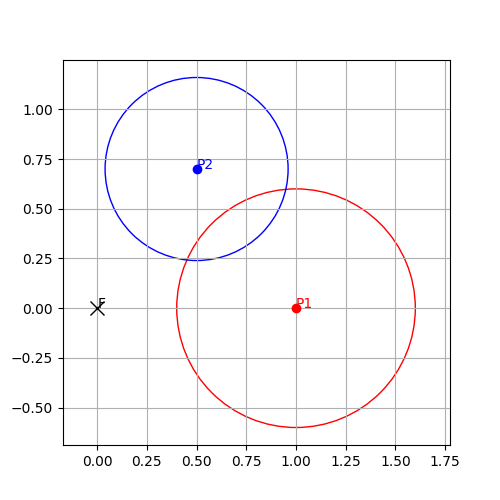

: 

In [134]:
P1 = [1,0,0]
P2 = [0.5,0.7,0]

a = 0.2
r1 = np.linalg.norm(P1)
r2 = np.linalg.norm(P2)

from matplotlib.patches import Circle

plt.close('all')
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(0,0,'kx',ms=10)
ax.text(0,0,'F')
ax.plot(P1[0],P1[1],'ro')
ax.text(P1[0],P1[1],'P1',color='r')
ax.plot(P2[0],P2[1],'bo')
ax.text(P2[0],P2[1],'P2',color='b')

c1 = Circle(P1,radius=2*a-r1,color='r',fill=False)
ax.add_patch(c1)

c2 = Circle(P2,radius=2*a-r2,color='b',fill=False)
ax.add_patch(c2)

ax.axis('equal')
ax.grid();


- Como vemos siempre hay dos puntos.

### Para saber más

Consulte el repositorio en línea del curso para otro material.

<hr/>

*Los cuadernos de clase del curso de astrodinámica también están [disponibles en línea](https://github.com/seap-udea/notas-astrodyn).*